<a href="https://colab.research.google.com/github/obarreto/jupyter-notebooks/blob/main/pso_methaeurisca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

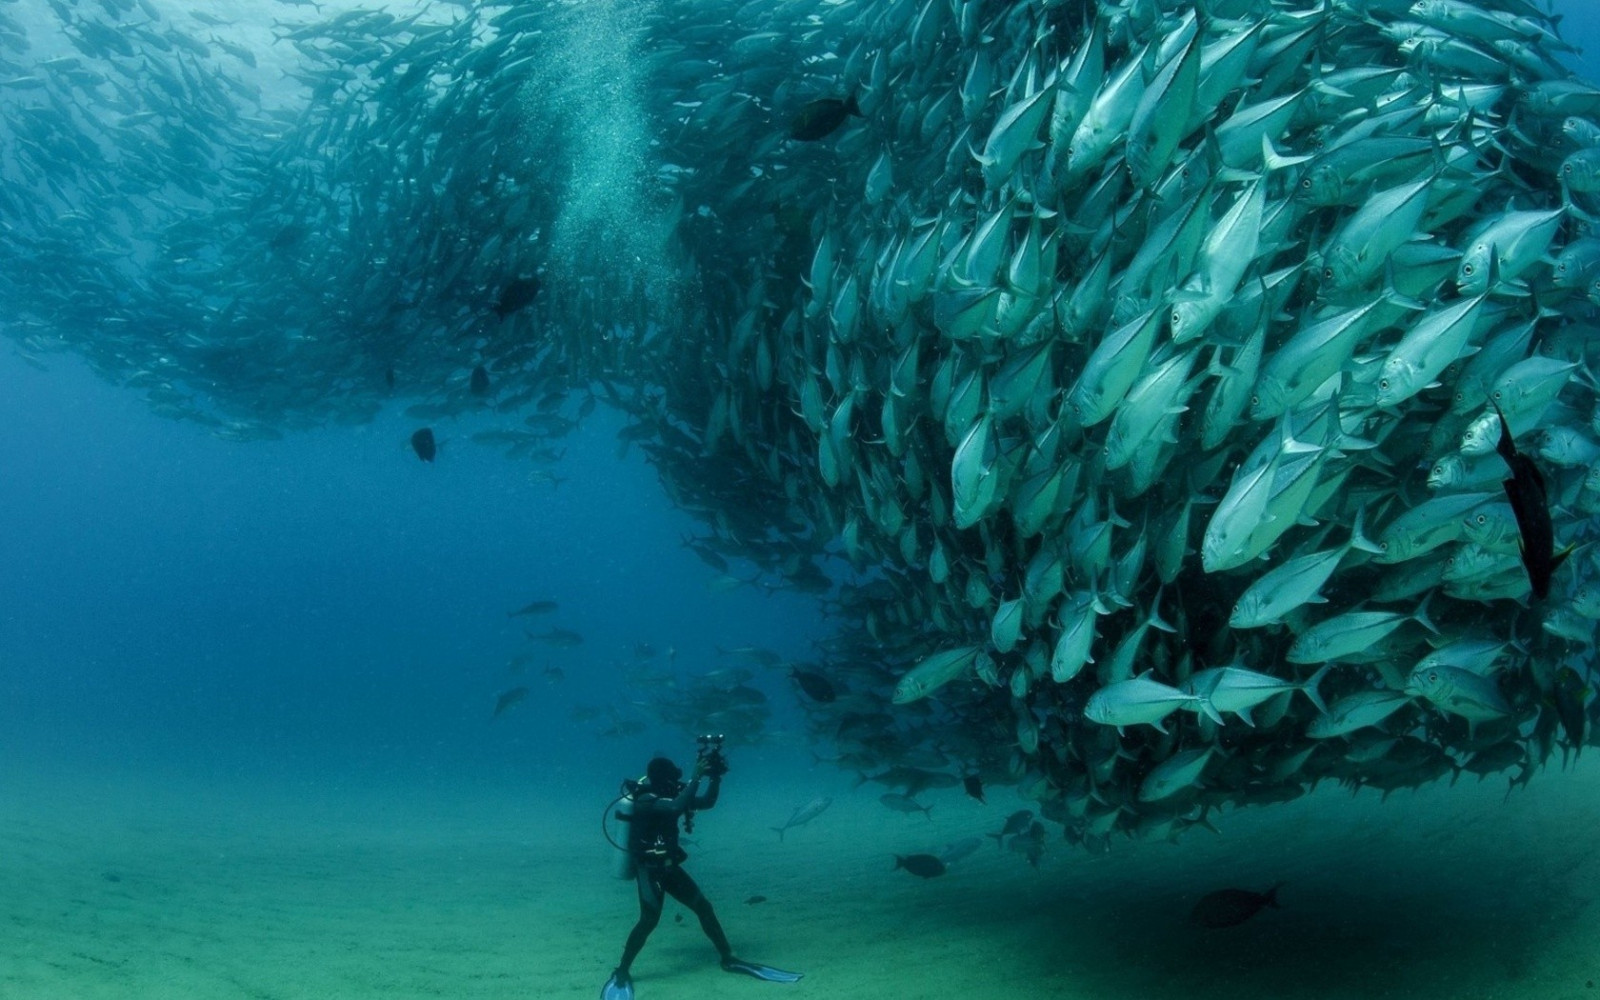

# Introduction to Particle Swarm Optimization (PSO)

PSO é um algoritmo de otimização metaheurística inspirado em bandos de pássaros e cardumes de peixes. É simples, eficaz e amplamente utilizado em diversas áreas. O algoritmo imita a inteligência de enxame para resolver problemas complexos com eficiência.


O Algoritmo PSO: Conceitos Básicos

1. **Partículas**: Representam soluções potenciais por sua posição e velocidade no espaço de busca.

2. **Enxame**: Um grupo de partículas buscando coletivamente a melhor solução.

3. **Função de Aptidão**: Mede a qualidade da solução atual de cada partícula.

4. **Melhores Soluções**: Melhor Global (gBest): Melhor solução geral; Melhor Pessoal (pBest): Melhor solução por partícula individual

# Modelagem Humanos

"Os humanos ajustam não apenas o movimento físico, mas também as variáveis ​​cognitivas ou experimentais. Normalmente, não caminhamos e giramos em uníssono (embora algumas pesquisas fascinantes sobre conformidade humana mostrem que somos capazes disso); em vez disso, tendemos a ajustar nossas crenças e atitudes para nos conformarmos com as de nossos pares sociais."
Particle Swarm Optimization James Kennedy' and Russell Eberhart2 1995




# Collision

"Dois indivíduos podem ter atitudes e crenças idênticas sem colidir, mas dois pássaros não podem ocupar a mesma posição no espaço sem colidir. Parece razoável, ao discutir o comportamento social humano, mapear o conceito de mudança no análogo de movimento do peixe-pássaro. Isso é consistente com a visão aristotélica clássica de mudança qualitativa e quantitativa como tipos de movimento. Assim, além de se moverem pelo espaço físico tridimensional e evitarem colisões, os humanos mudam no espaço multidimensional abstrato, livre de colisões. O espaço físico, é claro, afeta as entradas de informação, mas é indiscutivelmente um componente trivial da experiência psicológica. Os humanos aprendem a evitar colisões físicas desde cedo; a navegação no espaço psicossocial n-dimensional requer décadas de prática — e muitos de nós nunca parecem adquirir todas as habilidades de que precisamos!"

Particle Swarm Optimization James Kennedy' and Russell Eberhart2 1995


# Algoritmo PSO Passo a Passo

* Inicialize partículas com posições e velocidades aleatórias.

* Avalie a aptidão de cada partícula usando a função objetivo.

* Atualize o recorde pessoal da partícula se a posição atual for melhor.

* Atualize o recorde global se algum recorde pessoal for superior.

* Atualize a velocidade da partícula usando equações PSO.

* Mova as partículas atualizando suas posições.

* Repita até que os critérios de término sejam atendidos.

In [ ]:

#Define the PSO parameters
class Particle:
    def __init__(self, n_assets):
        #Initialize a particle with random weights and velocities
        self.position = np.random.rand(n_assets)
        self.position /= np.sum(self.position) # Normalize weigths o they sum to 1
        self.velocity = np.random.rand(n_assets)
        self.best_position = np.copy(self.position)
        self.best_score = float('inf') # Start with a very high score



In [ ]:
def objective_function(weights, returns, covariance):
        """
        Calcule o desempenho da carteira.
        - pesos: Pesos dos ativos na carteira.
        - retornos: Retornos esperados dos ativos.
        - covariância: Matriz de covariância que representa o risco.
        """
        portfolio_return = np.dot(weights, returns) # Calculate the portifolio return
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance, weights))) # Calculate portifolio risk (standard deviation)
        return -portfolio_return / portfolio_risk # We want to maxcimize return and minimize risk



In [ ]:
def update_particles(particles, global_best_position, returns, covariance, w, c1, c2):
        """
        Atualiza a posição e a velocidade de cada partícula.
        - particles: Lista de objetos de partículas
        - global_best_position: Melhor posição encontrada por todas as partículas.
        - returns: Retornos esperados dos ativos.
        - covariância: Matriz de covariância que representa o risco.
        - w: Peso de inércia para controlar o efeito da velocidade anterior da partícula.
        - c1: Coeficiente cognitivo para atrair as partículas em direção à sua melhor posição
        - c2: Coeficiente social para atrair as partículas em direção à melhor posição global.
        """
        for particle in particles:
           # Coeficientes aleatórios para atualização de velocidade
            r1, r2 = np.random.rand(len(particle.position)), np.random.rand(len(particle.position))
            #velocidade de atualização
            particle.velocity = (w * particle.velocity +
                                 c1 * r1 * (particle.best_position - particle.position) +
                                 c2 * r2 * (global_best_position - particle.position))
            # Atualizar posição
            particle.position += particle.velocity
            particle.position = np.clip(particle.position, 0, 1) # Certifique-se de que os pesos estejam entre 0 e 1
            particle.position /= np.sum(particle.position) #Normalizar pesos para somar 1
            # Avalie a nova posição
            score = objective_function(particle.position, returns, covariance)
            if score < particle.best_score:
                #Atualizar a melhor posição conhecida da partícula e a pontuação
                particle.best_position = np.copy(particle.position)
                particle.best_score = score

#https://gamma.app/docs/Introduction-to-Particle-Swarm-Optimization-PSO-kjssbrpqptsvklf?mode=doc
#https://en.wikipedia.org/wiki/Particle_swarm_optimization

# Equações PSO Explicadas

### Atualização de Velocidade

v_i(t+1) = w*v_i(t) + c1*r1*(pMelhor_i - x_i(t)) + c2*r2*(gMelhor_i - x_i(t))

### Atualização de Posição

x_i(t+1) = x_i(t) + v_i(t+1)

### Parâmetros

w: peso de inércia, c1/c2: coeficientes de aceleração, r1/r2: fatores aleatórios




---

#### Vantagens e Desvantagens do PSO

Vantagens:

* Implementação simples com poucos parâmetros

* Eficaz para otimização global

* Não requer informações de gradiente

Desvantagens:

* Risco de convergência prematura

* Sensível ao ajuste de parâmetros

* Alto custo computacional para problemas grandes

### Implementação do PSO

https://www.datacamp.com/tutorial/swarm-intelligence

In [ ]:
def pso_portfolio_optimization(n_particles, n_iterations, returns, covariance):
    """
    Execute a Otimização do Enxame de Partículas para encontrar os pesos ótimos dos ativos.
    - n_particles: Número de partículas no enxame.
    - n_interations: Número de iterações para a otimização.
    - returns: Retornos esperados dos ativos.
    - covariância: Matriz de covariância que representa o risco.
    """
    #Inicializa as Particulas
    particles = [Particle(len(returns)) for _ in range(n_particles)]
    # Inicializa a melhor posição global
    global_best_position = np.random.rand(len(returns))
    global_best_position /= np.sum(global_best_position)
    global_best_score = float('inf')

    #PSO parameters
    w = 0.5 # Peso de inércia: o quanto as partículas são influenciadas por sua própria direção
    c1 = 1.5 # Coeficiente cognitivo: quão bem as partículas aprendem com suas próprias melhores soluções
    c2 = 0.5 # Coeficiente social: quão bem as partículas aprendem com as melhores soluções
    history = [] # Para armazenar a melhor pontuação em cada iteração

    for _ in range(n_iterations): # Repita este bloco de código n_interatios vezes, mas não me importo com o valor do índice"
                                  # não precisa saber em que iteração está( a não ser que queira
        # guardar ou mostrar esse número)
        update_particles(particles, global_best_position, returns, covariance, w, c1, c2)
        for particle in particles:
            score = objective_function(particle.position, returns, covariance)
            if score < global_best_score:
                # Atualizar a melhor posição global e pontuação
                global_best_position = np.copy(particle.position)
                global_best_score = score
        # Armazene a melhor pontuação (relação retorno/risco negativa) para plotagem
        history.append(-global_best_score)

    return global_best_position, history

# Dados de exemplo para 3 ativos
returns = np.array([0.02, 0.28, 0.15]) #Retornos esperados para cada ativo
covariance = np.array([[0.1, 0.02, 0.03], #Matriz de covariância para riscos de ativos
                       [0.02, 0.08, 0.04],
                       [0.03, 0.04, 0.07]])


# [link text](#https://en.wikipedia.org/wiki/Particle_swarm_optimization://)

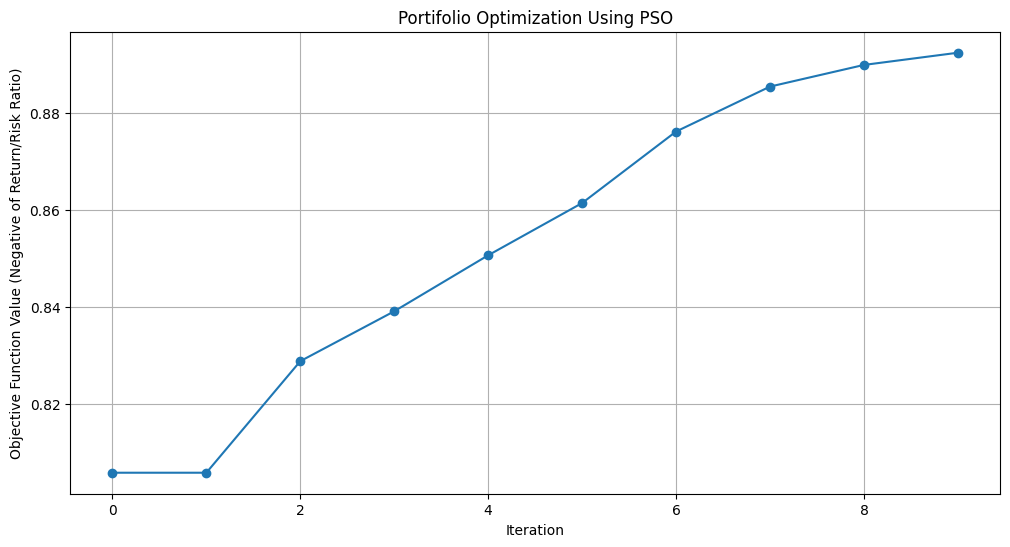

Optimal Asset Weights: [0.1622856 0.5802549 0.2574595]


In [ ]:
#Execute o algoritmo
n_particles = 10 # Número de partículas
n_iterations = 10 # numero de iterações

best_weights, optimization_history = pso_portfolio_optimization(n_particles, n_iterations, returns, covariance)
# Plotting the optimization process
plt.figure(figsize=(12, 6))
plt.plot(optimization_history, marker='o')
plt.title('Portifolio Optimization Using PSO')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Negative of Return/Risk Ratio)')
plt.grid(True) #Turn off grid lines
plt.show()

#Display the optimal asst weights
print(f"Optimal Asset Weights: {best_weights}")

### Aplicações da otimização por enxame de partículas

A PSO é utilizada por sua simplicidade e eficácia na resolução de diversos problemas de otimização, particularmente em domínios contínuos. Sua flexibilidade a torna útil para diversos cenários do mundo real, onde soluções precisas são necessárias.



### Essas aplicações incluem:

Aprendizado de máquina: A PSO pode ser aplicada para ajustar hiperparâmetros em algoritmos de aprendizado de máquina, ajudando a encontrar as melhores configurações de modelo.
Projeto de engenharia: A PSO é útil para otimizar parâmetros de projeto de sistemas como componentes aeroespaciais ou circuitos elétricos.
Modelagem financeira: Em finanças, a PSO pode auxiliar na otimização de portfólios, minimizando riscos e maximizando retornos.



A capacidade da PSO de explorar com eficiência espaços de soluções a torna aplicável em diversas áreas, da robótica à gestão de energia e logística.

In [ ]:
#append: adicionar um item numa lista
#Imagina que você tem um báu de tesouro(uma lista) e quer ir guardando moedas(valores) dentro.
mochila = []
mochila.append('corda')
mochila.append('búsula')
mochila.append('pão')
print(mochila)
print("O append sempre adiciona um item por sua vez no final da lista")

['corda', 'búsula', 'pão']
O append sempre adiciona um item por sua vez no final da lista


In [ ]:
#zip: juntar listas como se fosse um zíper
# Imgina duas listas andando lado a lado, e você quer percorrer as duas ao mesmo tempo, como um par de remos no barco
nomes = ['Janaína', 'Larissa', 'Sandra']
idades = [42, 36,  51]
for nome, idade in zip(nomes, idades):
    print(f'{nome} tem {idade} anos')

Janaína tem 42 anos
Larissa tem 36 anos
Sandra tem 51 anos


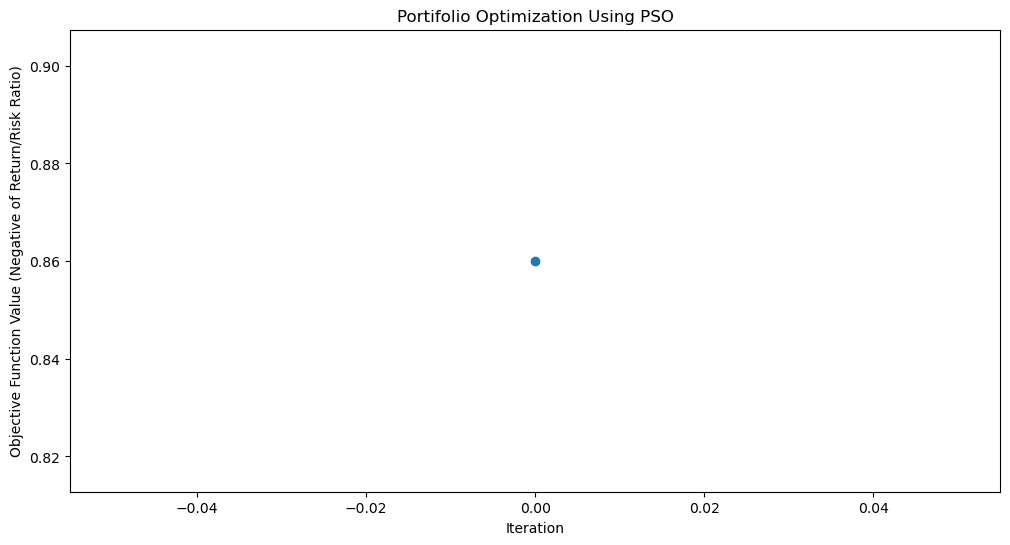

Optimal Asset Weights: [0.16538761 0.33025883 0.50435356]


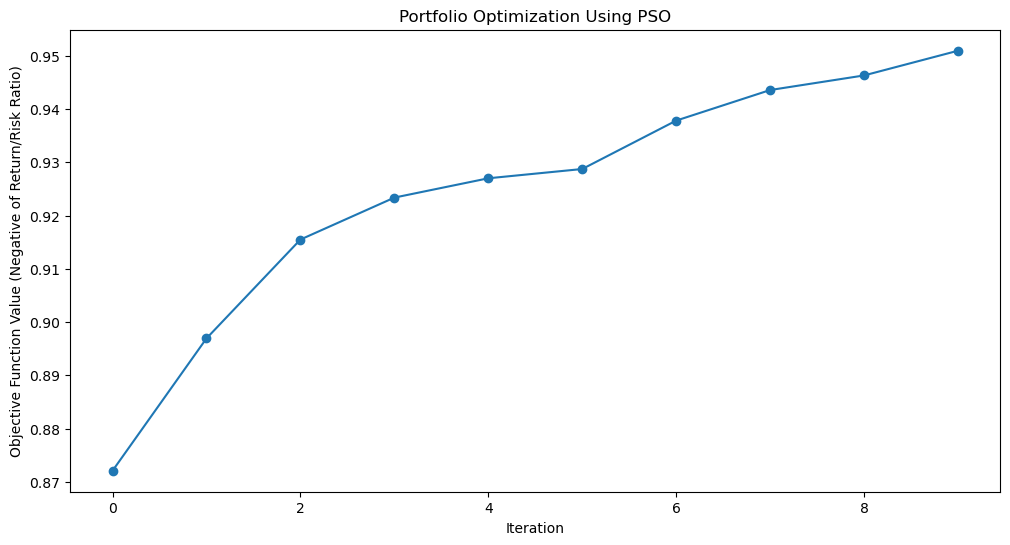

Optimal Asset Weights: [0.06023547 0.67996784 0.2597967 ]


In [ ]:
# 1. Imports
import numpy as np
import matplotlib.pyplot as plt

# 2. Classe Particle
class Particle:
    def __init__(self, n_assets):
        self.position = np.random.rand(n_assets)
        self.position /= np.sum(self.position)
        self.velocity = np.random.rand(n_assets)
        self.best_position = np.copy(self.position)
        self.best_score = float('inf')

# 3. Função objetivo
def objective_function(weights, returns, covariance):
    portfolio_return = np.dot(weights, returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
    return -portfolio_return / portfolio_risk

# 4. Atualização de partículas
def update_particles(particles, global_best_position, returns, covariance, w, c1, c2):
    for particle in particles:
        r1, r2 = np.random.rand(len(particle.position)), np.random.rand(len(particle.position))
        particle.velocity = (w * particle.velocity +
                             c1 * r1 * (particle.best_position - particle.position) +
                             c2 * r2 * (global_best_position - particle.position))
        particle.position += particle.velocity
        particle.position = np.clip(particle.position, 0, 1)
        particle.position /= np.sum(particle.position)
        score = objective_function(particle.position, returns, covariance)
        if score < particle.best_score:
            particle.best_position = np.copy(particle.position)
            particle.best_score = score

# 5. PSO principal
def pso_portfolio_optimization(n_particles, n_iterations, returns, covariance):
    particles = [Particle(len(returns)) for _ in range(n_particles)]
    global_best_position = np.random.rand(len(returns))
    global_best_position /= np.sum(global_best_position)
    global_best_score = float('inf')

    w, c1, c2 = 0.5, 1.5, 0.5
    history = []

    for _ in range(n_iterations):
        update_particles(particles, global_best_position, returns, covariance, w, c1, c2)
        for particle in particles:
            score = objective_function(particle.position, returns, covariance)
            if score < global_best_score:
                global_best_position = np.copy(particle.position)
                global_best_score = score
        history.append(-global_best_score)

    return global_best_position, history

# 6. Dados de exemplo
returns = np.array([0.02, 0.28, 0.15])
covariance = np.array([[0.1, 0.02, 0.03],
                       [0.02, 0.08, 0.04],
                       [0.03, 0.04, 0.07]])

# 7. Rodar o algoritmo
n_particles = 10
n_iterations = 10
best_weights, optimization_history = pso_portfolio_optimization(n_particles, n_iterations, returns, covariance)

# 8. Plot
plt.figure(figsize=(12, 6))
plt.plot(optimization_history, marker='o')
plt.title('Portfolio Optimization Using PSO')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Negative of Return/Risk Ratio)')
plt.grid(False)
plt.show()

# 9. Resultados
print(f"Optimal Asset Weights: {best_weights}")
